(253680, 22)
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0     3.0
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0                   0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0     1.0
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0                   0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0     8.0
3           0.0     1.0       0.0        1.

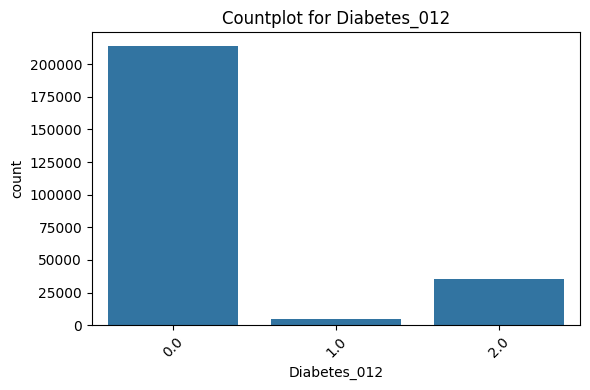

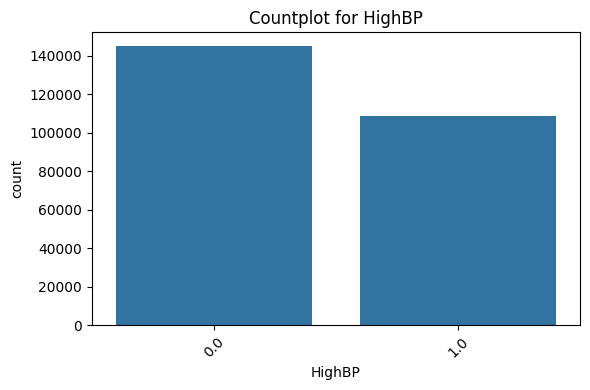

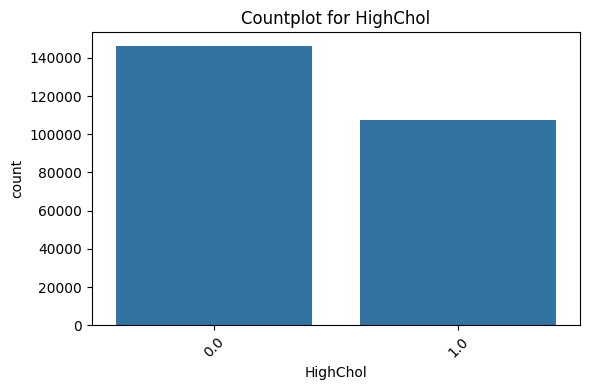

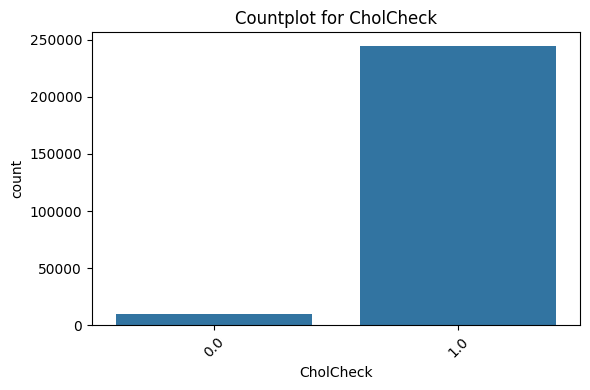

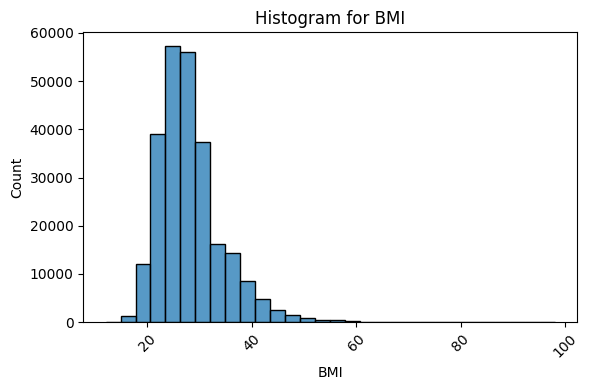

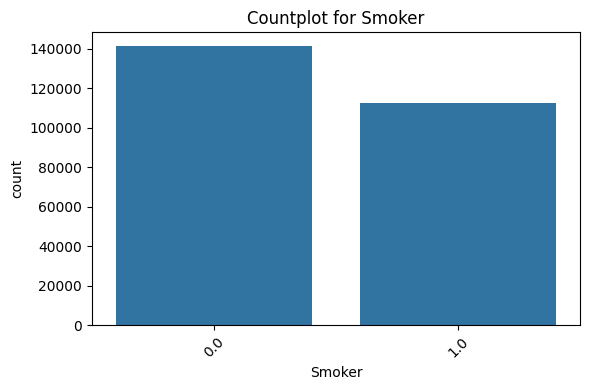

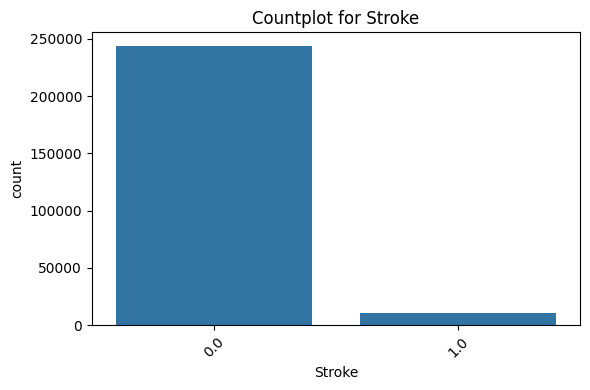

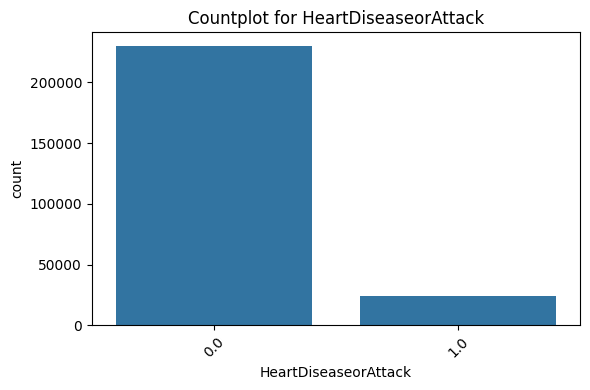

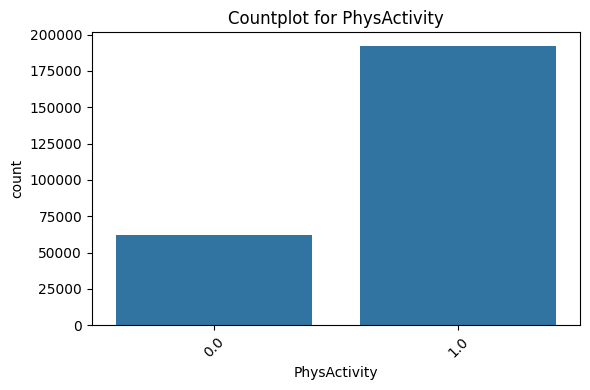

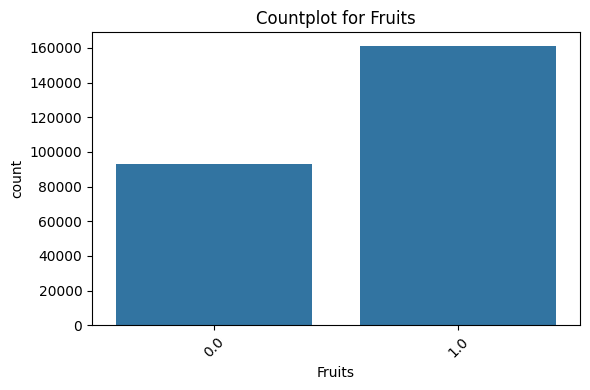

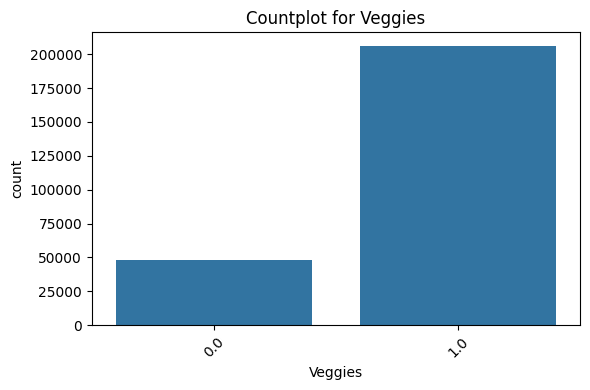

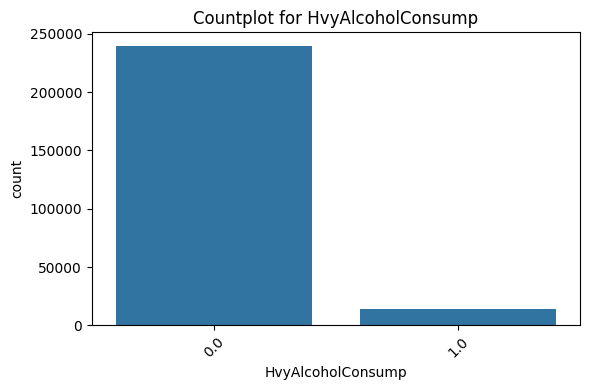

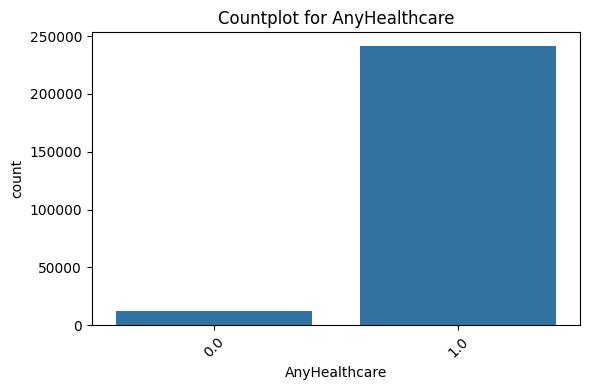

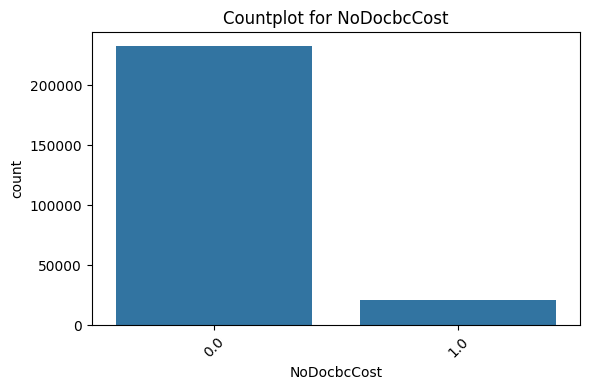

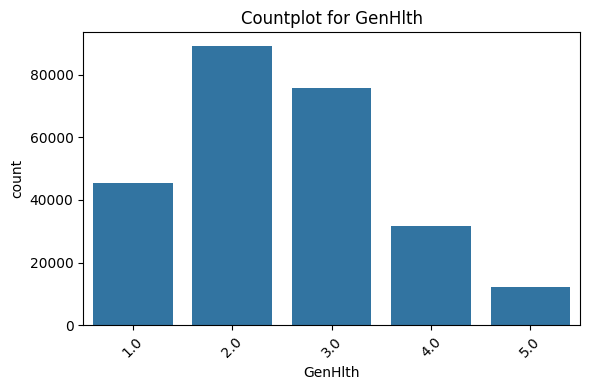

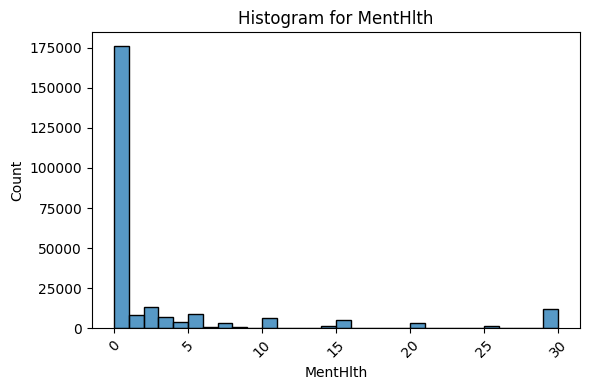

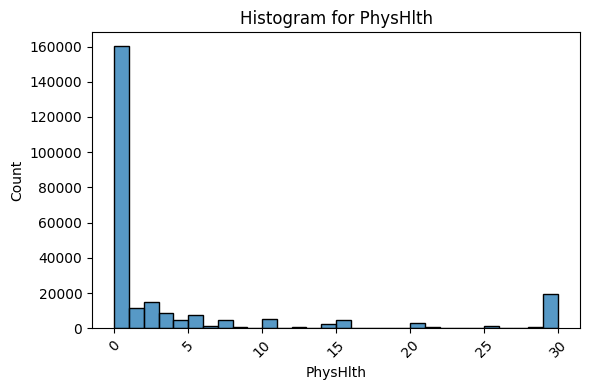

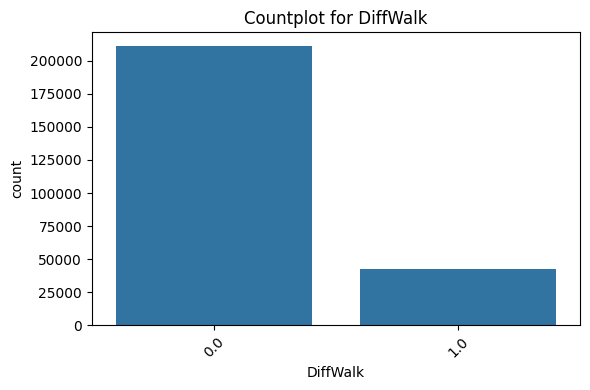

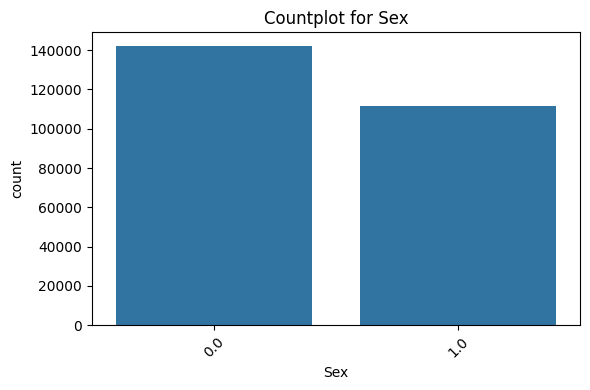

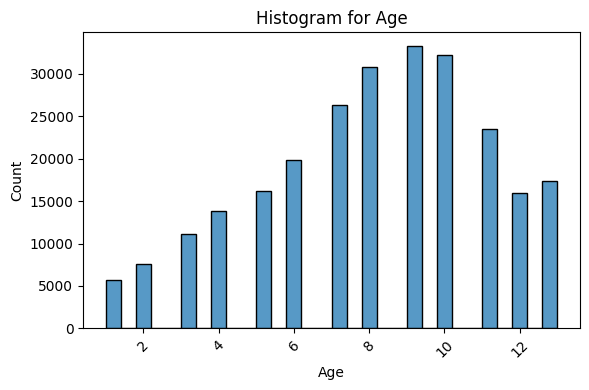

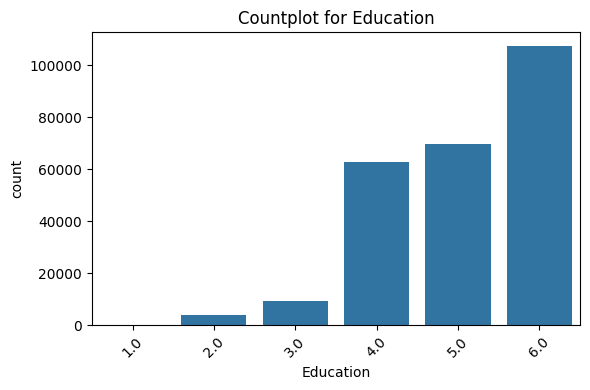

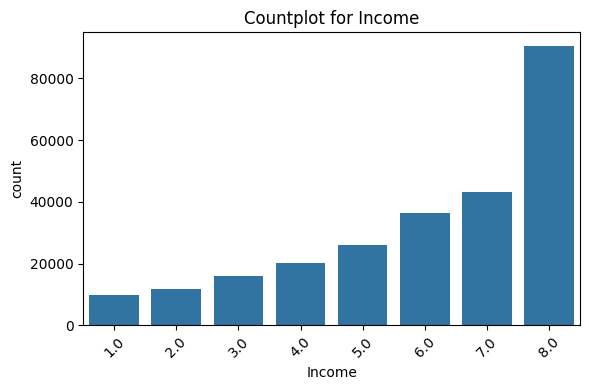

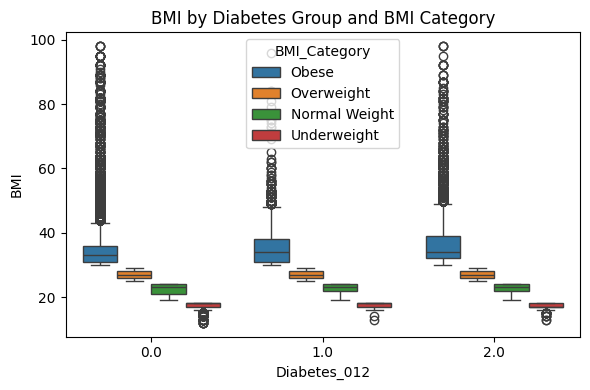

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file 
df = pd.read_csv("diabetes.csv") 

# Set the display setting so that columns are shown across the screen and not truncated
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)

# Review the features to see what they look like and to check distributions
print(df.shape)
print(df.head(10))
print(df.describe().T)
print(df.info)

 # Review the data types of each feature. All are floats! 
df.columns.to_list()
print("The datatypes are:\n", df.dtypes)

# Reviewing the unique values 
print("The number of unique values is:\n",df.nunique().sort_values())

# Reviewing the level of null values. There are none!
print("The level of null values is:\n", df.isnull().sum())

# show all of the columns in diabetes with associated unique values for familarisation with the data file
for column in df.columns:
    print(f"\ncolumn: {column}")
    print(sorted(df[column].unique()))

# EDA
# We will look at the distrubutions of all variables (as all are floats)
# Plot the data using bar charts / histograms as appropriate
for col in df.columns:
    plt.figure(figsize=(6,4))

    # If the column is binary or categorical (few unique values)
    if df[col].nunique() <= 10:
        sns.countplot(data=df, x=col)
        plt.title(f"Countplot for {col}")
    
    # If the column is numeric with many unique values
    else:
        sns.histplot(data=df, x=col, bins=30, kde=False)
        plt.title(f"Histogram for {col}")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# As a baseline I want to know the values for Diabetes_012 which will be the main Target in any analysis
# No diabetes=213,703
# Prediabetes: 4,631
# Diabetes: 35,346

df["Diabetes_012"].value_counts()

# Some of the features could be banded e.g. 
# BMI could be banded into 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obese 
# 

# 1. BMI_Category
# 1     31273  
# 2    68953 
# 3    93749
# 4    87851

# Define the conditions for BMI categories
conditions = [
    df["BMI"] <= 18.5,  # Underweight
    (df["BMI"] > 18.5) & (df["BMI"] <= 24.8),  # Normal Weight
    (df["BMI"] >= 25) & (df["BMI"] <= 29.9),  # Overweight
    df["BMI"] >= 30  # Obese
]

values = ["Underweight", "Normal Weight", "Overweight", "Obese"]

# Apply np.select to categorize BMI
df["BMI_Category"] = np.select(conditions, values, default="Unknown")

plt.figure(figsize=(6,4))
sns.boxplot(x='Diabetes_012', y='BMI', hue='BMI_Category', data=df)
plt.title("BMI by Diabetes Group and BMI Category")
plt.tight_layout()
plt.show()










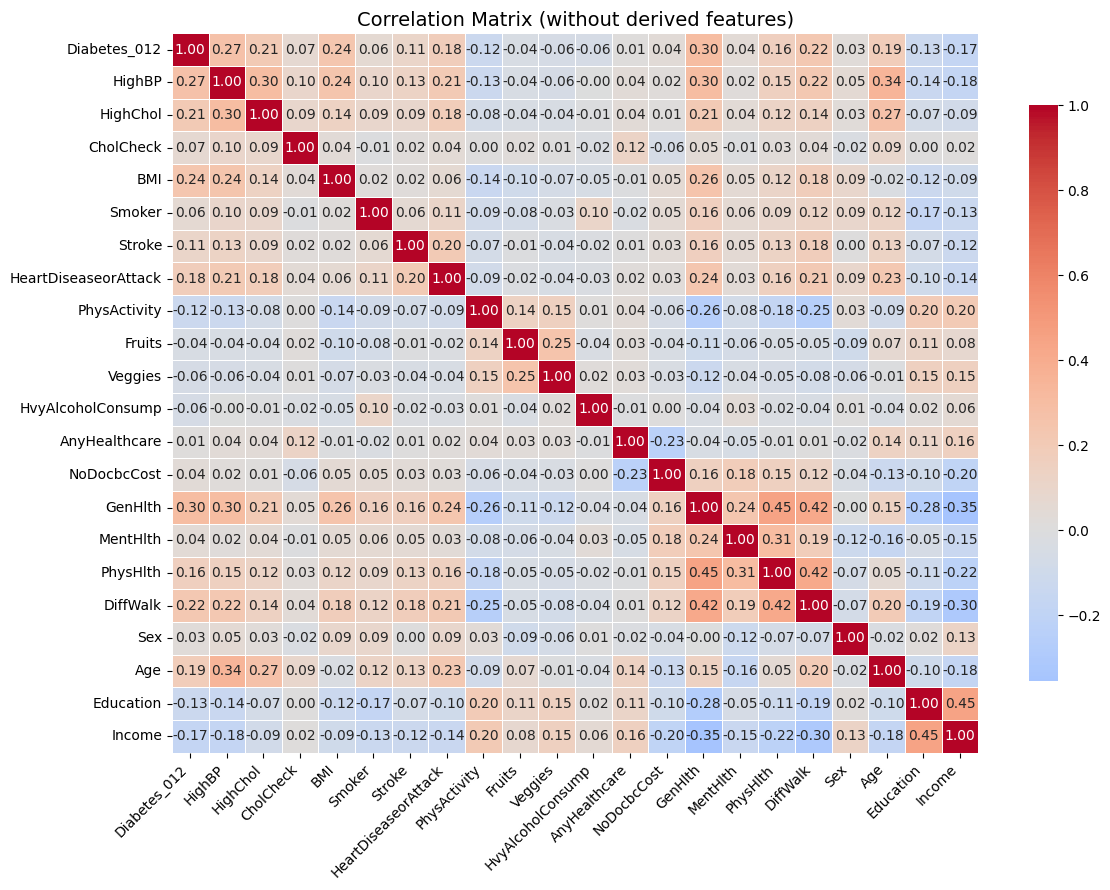

Diabetes_012            1.000000
GenHlth                 0.297138
HighBP                  0.271668
BMI                     0.235887
DiffWalk                0.223567
HighChol                0.210668
Age                     0.186357
HeartDiseaseorAttack    0.178564
PhysHlth                0.161718
Stroke                  0.105887
CholCheck               0.068018
Smoker                  0.063040
MentHlth                0.044921
NoDocbcCost             0.037379
Sex                     0.030143
AnyHealthcare           0.014530
Fruits                 -0.042268
HvyAlcoholConsump      -0.057244
Veggies                -0.059353
PhysActivity           -0.121988
Education              -0.126862
Income                 -0.172611
Name: Diabetes_012, dtype: float64


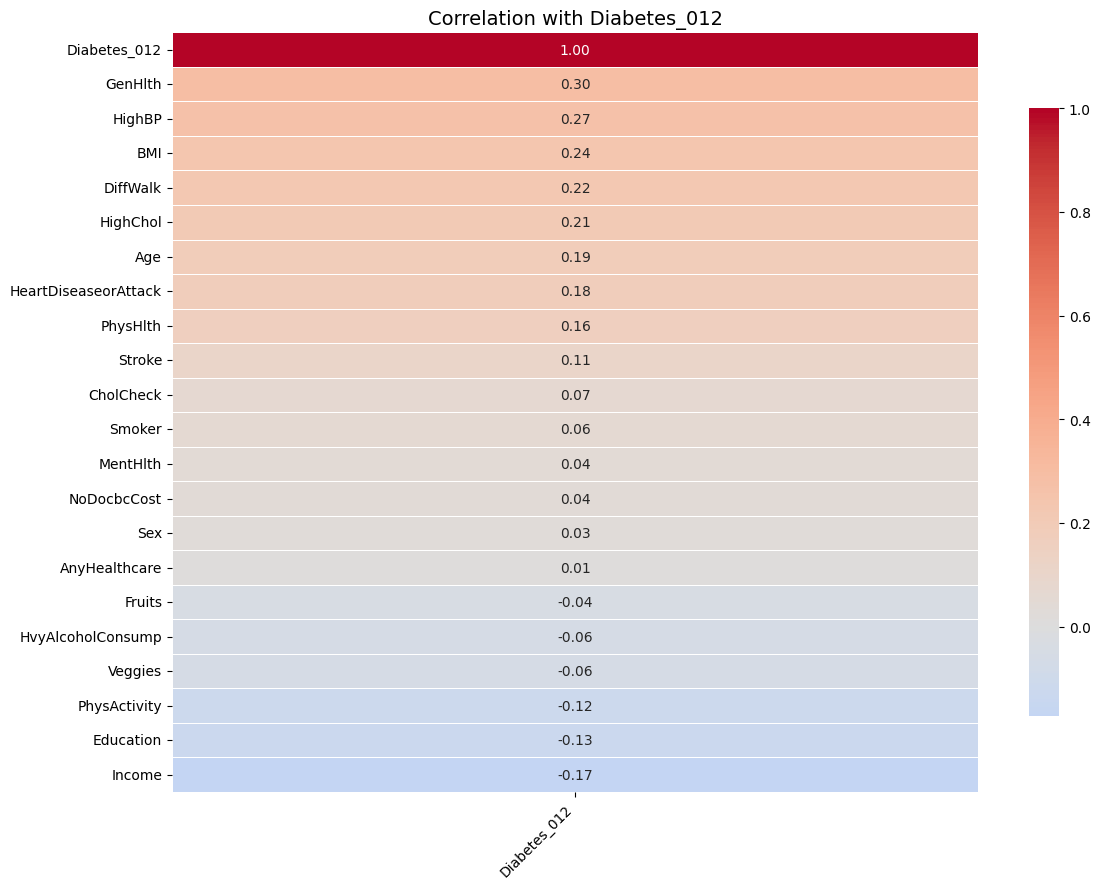

In [4]:
## Correlations: Need to specigy Correlations as Spearman as distribution are skewed/not normally distributed 
# Drop banded BMI grouping for all statistical tests.
# 1. Correlation. Firstly do a full correlation of all features vs all features

# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).copy()

# Drop derived/duplicate columns (like BMI_Category_Code)
cols_to_drop = ['BMI_Category_Code']  # add any others if needed
df_numeric = df_numeric.drop(columns=[c for c in cols_to_drop if c in df_numeric.columns])

corr_matrix = df_numeric.corr(method="spearman")

plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix (without derived features)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Add target back temporarily for correlation
df_numeric_with_target = df_numeric.copy()
df_numeric_with_target['Diabetes_012'] = df['Diabetes_012']

corr_target = df_numeric_with_target.corr(method="spearman")['Diabetes_012'].sort_values(ascending=False)
print(corr_target)

# Convert to DataFrame for heatmap
corr_df = corr_target.to_frame()

plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation with Diabetes_012", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation summary: There are not that many strong correlations with Diabetes_012. GenHlth is the best one:
# Diabetes_012            1.000000
# GenHlth                 0.297138 - Worse general health, higher
# HighBP                  0.271668
# BMI                     0.235887
# DiffWalk                0.223567
# HighChol                0.210668
# Age                     0.186357
# HeartDiseaseorAttack    0.178564
# PhysHlth                0.161718
# Stroke                  0.105887
# CholCheck               0.068018
# Smoker                  0.063040
# MentHlth                0.044921
# NoDocbcCost             0.037379
# Sex                     0.030143
# AnyHealthcare           0.014530
# Fruits                 -0.042268
# HvyAlcoholConsump      -0.057244
# Veggies                -0.059353
# PhysActivity           -0.121988
# Education              -0.126862
# Income                 -0.172611

In [5]:
# Chi Sqaure for all of the binary variables. What matters is the Cramers_V score.
# Results Summary: 
# Strongest predictors
# HighBP (V=0.272): Moderate, clincially meaningful
# DiffWalk (V=0.224): Moderate, clincially meaningful
# HighChol (V=0.211): Moderate, clincially meaningful

# Weaker but still relevant predictors
# HeartDiseaseAttack(V=0.180): Weak but still clinically meaningful
# PhysActivity (V=0.122): Weak but still clinically meaningful
# Stroke (V=0.107): Weak but still clinically meaningful

# Findings to date: 
# The strongest predicotrs of diabetes are High Blood Presssure, High cholesterol, High BMI/Obesity, poorer general health. mobility ddifficulty and older age.

# Moderator predictors are heart disease, physical inactivity and stroke

# Weak predictors are: smoking, diet (fruit/vegetables), alcohol, sex and education  

# Logistic Regression


In [6]:
# Chi-square tests for specified binary variables vs Diabetes_012 — combined summary table
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

binary_vars = [
    'HighBP',
    'HighChol',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Smoker',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'Sex',
    'DiffWalk',
    'NoDocbcCost'
 ]
labels = sorted(df['Diabetes_012'].dropna().unique())

def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.values.sum()
    r, k = confusion_matrix.shape
    if n == 0 or min(r-1, k-1) == 0:
        return np.nan
    return np.sqrt(chi2 / (n * min(r-1, k-1)))

results = []
print('Computing chi-square and Cramer\'s V for binary variables vs Diabetes_012...\n')
for var in binary_vars:
    if var not in df.columns:
        print(f"{var}: NOT IN DATA -- skipping\n")
        continue
    ct = pd.crosstab(df[var], df['Diabetes_012'])
    if ct.size == 0:
        print(f"{var}: empty crosstab -- skipping\n")
        continue
    try:
        chi2, p, dof, expected = chi2_contingency(ct)
        cv = cramers_v(ct)
        # counts of 'positive' (value==1) per Diabetes_012 group when applicable
        row = {'variable': var, 'chi2': chi2, 'p': p, 'dof': dof, 'cramers_v': cv}
        is_binary_one = df[var].isin([1]).any()
        for lbl in labels:
            col_name = f'pos_count_{int(lbl)}'
            if is_binary_one:
                cnt = int(df.loc[(df[var] == 1) & (df['Diabetes_012'] == lbl)].shape[0])
            else:
                cnt = np.nan
            row[col_name] = cnt
        results.append(row)
    except Exception as e:
        print(f"Error testing {var}: {e}\n")

# Build summary dataframe
if results:
    res_df = pd.DataFrame(results)
    # ensure pos_count columns appear in order 0,1,2 if present
    pos_cols = [c for c in res_df.columns if c.startswith('pos_count_')]
    ordered_cols = ['variable', 'chi2', 'p', 'dof', 'cramers_v'] + sorted(pos_cols)
    res_df = res_df[ordered_cols]
    res_df = res_df.sort_values('cramers_v', ascending=False).reset_index(drop=True)
    print('Summary table (sorted by Cramer\'s V):')
    display(res_df)
else:
    print('No results to display')

Computing chi-square and Cramer's V for binary variables vs Diabetes_012...

Summary table (sorted by Cramer's V):


,variable,chi2,p,dof,cramers_v,pos_count_0,pos_count_1,pos_count_2
0,HighBP,18794.644052,0.000000e+00,2,0.272191,79312,2913,26604
1,DiffWalk,12776.941889,0.000000e+00,2,0.224425,28269,1285,13121
2,HighChol,11258.920399,0.000000e+00,2,0.210671,81030,2875,23686
3,HeartDiseaseorAttack,8244.889107,0.000000e+00,2,0.180281,15351,664,7878
4,PhysActivity,3789.301463,0.000000e+00,2,0.122218,166491,3142,22287
5,Stroke,2916.751980,0.000000e+00,2,0.107228,6759,265,3268
6,Smoker,1010.511751,3.716732e-220,2,0.063114,91824,2282,18317
7,Veggies,893.841905,8.029646e-195,2,0.059359,175544,3561,26736
8,HvyAlcoholConsump,850.324048,2.261930e-185,2,0.057896,13216,208,832
9,Fruits,454.347059,2.186703e-99,2,0.042320,137416,2789,20693


# Time for Modelling: Logistic Regression First - using AI Agent and modified by the data analyst

Class distribution:
 Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

Accuracy: 0.6901

Classification report:
               precision    recall  f1-score   support

           0     0.9448    0.7049    0.8074     42741
           1     0.0361    0.1879    0.0606       926
           2     0.3359    0.6667    0.4468      7069

    accuracy                         0.6901     50736
   macro avg     0.4389    0.5198    0.4382     50736
weighted avg     0.8434    0.6901    0.7435     50736



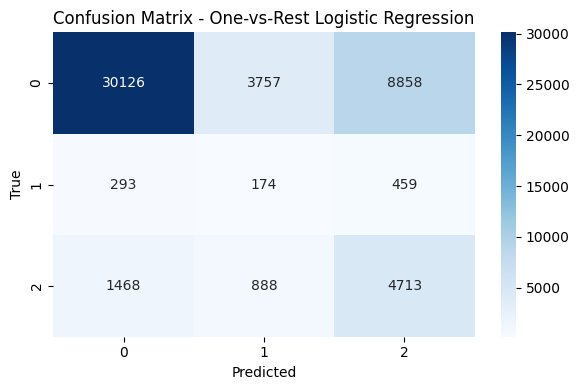


Top positive/negative coefficients per class:

class_0 - top positive features:
 HvyAlcoholConsump    0.147356
Income               0.131808
PhysHlth             0.058285
Education            0.043973
Fruits               0.026118
PhysActivity         0.019560
MentHlth             0.015637
Veggies              0.012094
Name: class_0, dtype: float64
class_0 - top negative features:
 GenHlth                -0.591752
BMI                    -0.486464
Age                    -0.455988
HighBP                 -0.342359
HighChol               -0.294155
CholCheck              -0.230646
Sex                    -0.128530
HeartDiseaseorAttack   -0.066086
Name: class_0, dtype: float64

class_1 - top positive features:
 Age            0.382599
BMI            0.294187
GenHlth        0.269638
HighChol       0.244021
HighBP         0.128909
CholCheck      0.127909
NoDocbcCost    0.099588
MentHlth       0.065714
Name: class_1, dtype: float64
class_1 - top negative features:
 Income                 -0.126

In [7]:
# Logistic regression using AI Agent and some minor tweaks!
# Findings Summary: 
# Accuracy: 0.8471
# Classification report:
# Precision = Of all the cases the model said werre diabestes, how many were truly diabetes (i.e. few false positives)
# recall = Of all the people who actually have diabetes, how many did the model correctly identify? (i.e. few false negatives)
# f1_score: = How well does the model perform when we care about both catching true cases and avoiding false alarms? 
# Support = How many real examples of this class were in the data?
# Class 0: no diabetes
# Class 1: prediabetes
# Class 2: diabetes

#              precision    recall  f1-score   support

#           0     0.8636    0.9748    0.9158     42741
#           1     0.0000    0.0000    0.0000       926
#           2     0.5285    0.1862    0.2753      7069
# Logistic regression has a good accuracy level and is good for predicting pre-diabetes but struggles to separte the diabetes classes. So RnadomForest is now needed.
# The same variables show up as strong predictors:
# HighBP
# HIghChol
# BMI
# GenHlth
# DiffWalk
# Age
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------
# Prepare numeric features & target
# -----------------------
X = df.select_dtypes(include=[np.number]).copy()

if 'Diabetes_012' in X.columns:
    X = X.drop(columns=['Diabetes_012'])
y = df['Diabetes_012'].astype(int)

print("Class distribution:\n", y.value_counts())

# -----------------------
# Train/test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------
# Scale features
# -----------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# -----------------------
# One-vs-Rest Logistic Regression
# -----------------------
base = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf = OneVsRestClassifier(base)   # OVR wrapper
clf.fit(X_train_s, y_train)

# Predict
y_pred = clf.predict(X_test_s)

# -----------------------
# Metrics
# -----------------------
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - One-vs-Rest Logistic Regression')
plt.tight_layout()
plt.show()

# -----------------------
# Coefficients per class
# -----------------------
coef_mat = np.vstack([est.coef_.ravel() for est in clf.estimators_])  # shape (n_classes, n_features)
coef_df = pd.DataFrame(coef_mat.T, index=X.columns, columns=[f'class_{c}' for c in clf.classes_])

print("\nTop positive/negative coefficients per class:")
for c in coef_df.columns:
    top_pos = coef_df[c].sort_values(ascending=False).head(8)
    top_neg = coef_df[c].sort_values().head(8)
    print(f"\n{c} - top positive features:\n", top_pos)
    print(f"{c} - top negative features:\n", top_neg)

# 

In [8]:
# Random Forest using AI Agent with some minor tweaks
# Result Sunmarry:
# Accuracy: 0.8383396404919584

# Classification report:
#              precision    recall  f1-score   support

#           0     0.8593    0.9688    0.9108     42741
#           1     0.0000    0.0000    0.0000       926
#           2     0.4682    0.1591    0.2375      7069

# # Random Forest has a good accuracy level and is good for predicting peple without diabetes but like logistic regression struggles 
# to separate the diabetes classes. 
# TOnce agin he same variables show up as strong predictors:
# Top 15 feature importances:
# BMI                  0.143816
# Age                  0.136396
# Income               0.100145
# PhysHlth             0.078207
# GenHlth              0.071546
# Education            0.070318
# MentHlth             0.065394
# Smoker               0.035637
# Fruits               0.035636
# Sex                  0.034450
# HighBP               0.034131
# PhysActivity         0.028288
# HighChol             0.028200
# Veggies              0.027919
# BMI_Category_Code    0.024494
# 
# Overall Summary: Random Forest feature importance identified BMI, age, income, physical health, and general health as the strongest 
# predictors of diabetes. These findings align closely with the earlier correlation, Chi‑Square, and logistic regression analyses. 
# Behavioral and lifestyle factors such as smoking, physical activity, and fruit/vegetable intake contributed modestly, 
# while demographic variables such as sex showed only weak predictive value. 
# 
# Summary Overall: Biological and functional health indicators were far more influential than lifestyle factors in predicting diabetes status.

Accuracy: 0.8390097760958688

Classification report:
               precision    recall  f1-score   support

           0     0.8591    0.9700    0.9112     42741
           1     0.0000    0.0000    0.0000       926
           2     0.4758    0.1570    0.2361      7069

    accuracy                         0.8390     50736
   macro avg     0.4449    0.3757    0.3824     50736
weighted avg     0.7900    0.8390    0.8005     50736


Confusion matrix:
 [[41458   128  1155]
 [  858     0    68]
 [ 5944    15  1110]]

Top 15 feature importances:
 BMI             0.177501
Age             0.136027
Income          0.099176
PhysHlth        0.079234
GenHlth         0.069971
Education       0.068742
MentHlth        0.065254
Fruits          0.035336
Smoker          0.035201
HighBP          0.034628
Sex             0.032991
Veggies         0.027648
PhysActivity    0.026967
HighChol        0.026519
DiffWalk        0.019217
dtype: float64


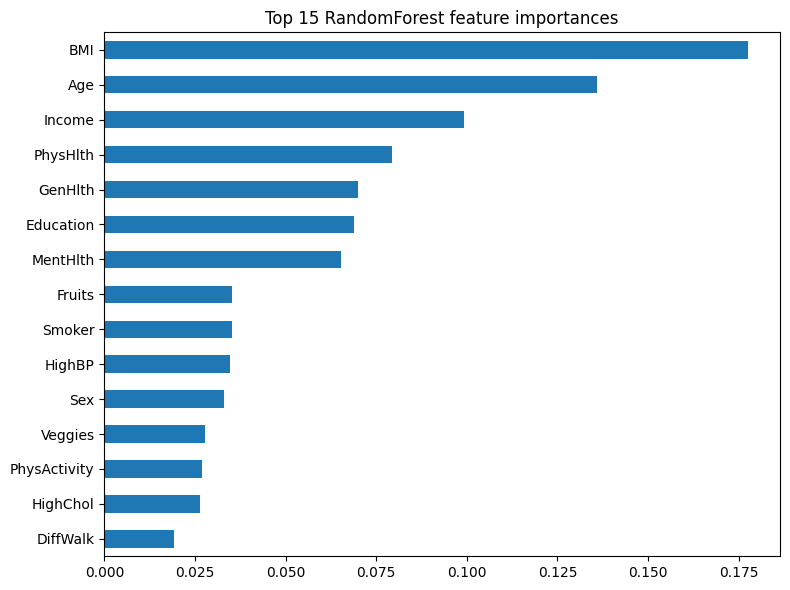

In [9]:
# Random Forest classifier (multiclass) — train / evaluate / importances
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare features and target (same preprocessing as used previously)
X = df.select_dtypes(include=["number"]).drop(columns=["Diabetes_012"]).copy()
y = df["Diabetes_012"].astype(int)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest — no scaling required, handle imbalance with class_weight
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importances
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 feature importances:\n", fi.head(15))

# Optional: plot the top importances
plt.figure(figsize=(8,6))
fi.head(15).sort_values().plot(kind='barh')
plt.title('Top 15 RandomForest feature importances')
plt.tight_layout()
plt.show()


In [10]:

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=20,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
)

print("Training RandomForest (class_weight only)...")
rf.fit(X_train, y_train)


Training RandomForest (class_weight only)...


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

Binary class distribution (original):
Diabetes_012
0    213703
1     39977
Name: count, dtype: int64

Class distribution (train): Counter({0: 170962, 1: 31982})
Class distribution (test): Counter({0: 42741, 1: 7995})

Training RandomForest with class-weighted learning (no SMOTE)...

Accuracy: 0.7410911384421318
ROC AUC: 0.8222640802896467

Classification report:
              precision    recall  f1-score   support

           0     0.9404    0.7395    0.8280     42741
           1     0.3499    0.7495    0.4771      7995

    accuracy                         0.7411     50736
   macro avg     0.6452    0.7445    0.6525     50736
weighted avg     0.8474    0.7411    0.7727     50736

Confusion matrix:
[[31608 11133]
 [ 2003  5992]]

Top 15 feature importances:
GenHlth                 0.210842
HighBP                  0.180472
BMI                     0.152517
Age                     0.111864
HighChol                0.089627
Income                  0.045198
DiffWalk                0.040819

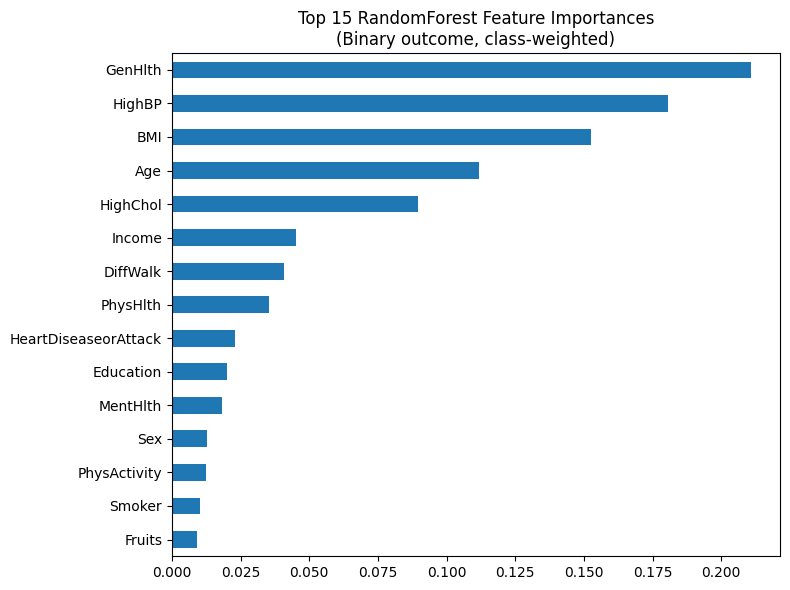


Feature importances saved to rf_binary_class_weight_feature_importances.csv


In [11]:
# RandomForest (binary) using class-weighted learning from above. Binary classificaiton of diabetes
# 0 = No diabetes, 1 = Pre-diabetes + Diabetes

# Summary: The top predictors for diabetes are:
# Self-reported general health
# Cardiometabolic risk factors (blood pressure, BMI, cholesterol)
# Age 
#  Additional contributions from socioeconomic and functional health variables

# Code generated via ChatGPT and modified by analyst

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)

# -----------------------
# Prepare features & binary target
# -----------------------
X = df.select_dtypes(include=["number"]).drop(columns=["Diabetes_012"]).copy()
y = (df["Diabetes_012"] > 0).astype(int)

print("Binary class distribution (original):")
print(y.value_counts())

# -----------------------
# Train/test split (stratified)
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\nClass distribution (train):", Counter(y_train))
print("Class distribution (test):", Counter(y_test))

# -----------------------
# RandomForest classifier (class-weighted, no resampling)
# -----------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=20,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
)

print("\nTraining RandomForest with class-weighted learning (no SMOTE)...")
rf.fit(X_train, y_train)

# -----------------------
# Evaluation
# -----------------------
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# -----------------------
# Feature importances
# -----------------------
fi = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 15 feature importances:")
print(fi.head(15))

# Optional plot
plt.figure(figsize=(8, 6))
fi.head(15).sort_values().plot(kind="barh")
plt.title("Top 15 RandomForest Feature Importances\n(Binary outcome, class-weighted)")
plt.tight_layout()
plt.show()

# Optional: save feature importances for Power BI
fi.to_csv("rf_binary_class_weight_feature_importances.csv", header=["importance"])
print("\nFeature importances saved to rf_binary_class_weight_feature_importances.csv")


Clinical / Physiological    69.02
Demographic                 13.11
Functional Health            9.92
Socioeconomic                6.88
Lifestyle                    1.08
dtype: float64


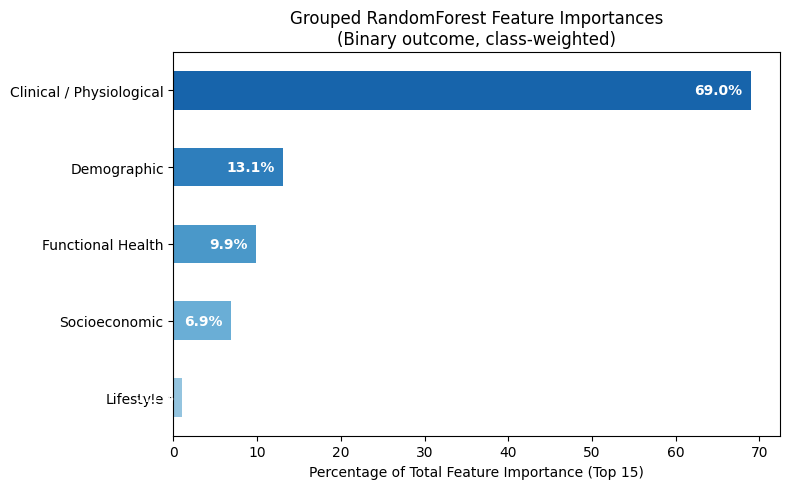

Saved grouped feature importances to CSV


In [12]:
# One final step. Grouping the existing top 15 features into health and lifestyle categories to add to the story
# AI genearted code modified by data analyst
# -----------------------
# Group feature importances
# -----------------------

feature_groups = {
    "Clinical / Physiological": [
        "GenHlth",
        "HighBP",
        "BMI",
        "HighChol",
        "HeartDiseaseorAttack",
    ],
    "Demographic": [
        "Age",
        "Sex",
    ],
    "Functional Health": [
        "DiffWalk",
        "PhysHlth",
        "MentHlth",
    ],
    "Socioeconomic": [
        "Income",
        "Education",
    ],
    "Lifestyle": [
        "Smoker",
        "Fruits""PhysHlth",
    ],
}
# -----------------------
# Aggregate feature importances by group
# -----------------------

grouped_importance = {}

for group, features in feature_groups.items():
    grouped_importance[group] = fi.loc[
        fi.index.intersection(features)
    ].sum()

grouped_fi = pd.Series(grouped_importance).sort_values(ascending=False)
grouped_fi_pct = grouped_fi / grouped_fi.sum() * 100

print(grouped_fi_pct.round(2))

import matplotlib.pyplot as plt
import numpy as np

# Sort values for plotting
sorted_fi = grouped_fi_pct.sort_values()

plt.figure(figsize=(8, 5))

# Create a gradient: lighter to darker blue
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(sorted_fi)))

ax = sorted_fi.plot(kind="barh", color=colors)

# Add % labels inside the bars
for i, v in enumerate(sorted_fi):
    ax.text(v - 1, i, f"{v:.1f}%", va='center', ha='right', color='white', fontweight='bold')

plt.xlabel("Percentage of Total Feature Importance (Top 15)")
plt.title("Grouped RandomForest Feature Importances\n(Binary outcome, class-weighted)")
plt.tight_layout()
plt.show()




grouped_fi_pct.to_csv(
    "rf_grouped_feature_importances.csv",
    header=["percentage_importance"]
)

print("Saved grouped feature importances to CSV")


In [13]:
# As the dataset is 


# Binary Logistic Regression for Prediabetes (Code 1) vs No Diabetes (Code 0)

Prediabetes vs Diabetes binary class distribution:
Diabetes_012
0    35346
1     4631
Name: count, dtype: int64

Accuracy: 0.5935
ROC AUC: 0.6236

Classification report:
              precision    recall  f1-score   support

           0     0.9152    0.5955    0.7215      7070
           1     0.1578    0.5788    0.2480       926

    accuracy                         0.5935      7996
   macro avg     0.5365    0.5872    0.4848      7996
weighted avg     0.8275    0.5935    0.6667      7996



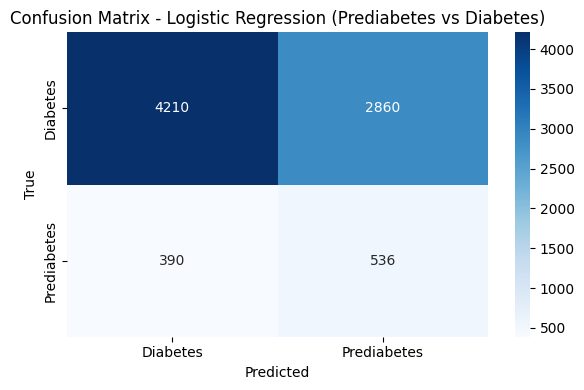


Top positive coefficients (Prediabetes):
NoDocbcCost          0.096779
HvyAlcoholConsump    0.096445
MentHlth             0.090738
PhysActivity         0.021958
PhysHlth             0.013255
Fruits               0.011589
Income              -0.001657
Smoker              -0.013158
Veggies             -0.022605
AnyHealthcare       -0.024457
dtype: float64

Top negative coefficients (Prediabetes):
HighChol               -0.032928
Education              -0.037143
Age                    -0.044614
DiffWalk               -0.058343
Sex                    -0.076815
Stroke                 -0.079813
HeartDiseaseorAttack   -0.114195
BMI                    -0.121888
HighBP                 -0.168438
GenHlth                -0.284741
dtype: float64


In [14]:
# Binary Logistic Regression for Prediabetes (Code 1) vs Diabetes (Code 2)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Filter data for prediabetes binary classification
df_prediabetes = df[df['Diabetes_012'].isin([1, 2])].copy()
X_pred = df_prediabetes.select_dtypes(include=[np.number]).drop(columns=['Diabetes_012'])
y_pred = (df_prediabetes['Diabetes_012'] == 1).astype(int)

print("Prediabetes vs Diabetes binary class distribution:")
print(y_pred.value_counts())

# Train/test split
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(
    X_pred, y_pred, test_size=0.2, stratify=y_pred, random_state=42
)

# Scale features
scaler_pred = StandardScaler()
X_train_pred_s = scaler_pred.fit_transform(X_train_pred)
X_test_pred_s = scaler_pred.transform(X_test_pred)

# Logistic Regression
lr_pred = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_pred.fit(X_train_pred_s, y_train_pred)

# Predict
y_pred_pred = lr_pred.predict(X_test_pred_s)
y_prob_pred = lr_pred.predict_proba(X_test_pred_s)[:, 1]

# Metrics
print(f"\nAccuracy: {accuracy_score(y_test_pred, y_pred_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_pred, y_prob_pred):.4f}")
print("\nClassification report:")
print(classification_report(y_test_pred, y_pred_pred, digits=4))

# Confusion matrix
cm_pred = confusion_matrix(y_test_pred, y_pred_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pred, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Diabetes', 'Prediabetes'], yticklabels=['Diabetes', 'Prediabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression (Prediabetes vs Diabetes)')
plt.tight_layout()
plt.show()

# Coefficients
coef_pred = pd.Series(lr_pred.coef_[0], index=X_pred.columns).sort_values(ascending=False)
print("\nTop positive coefficients (Prediabetes):")
print(coef_pred.head(10))
print("\nTop negative coefficients (Prediabetes):")
print(coef_pred.tail(10))

# Save All Confusion Matrices to CSV Files

In [16]:
# Save all confusion matrices to CSV files
import pandas as pd

# 1. Multiclass Logistic Regression Confusion Matrix
# Assuming cm is from the multiclass cell
try:
    cm_multiclass_df = pd.DataFrame(cm, index=['Predicted_0', 'Predicted_1', 'Predicted_2'], columns=['Actual_0', 'Actual_1', 'Actual_2'])
    cm_multiclass_df.to_csv('confusion_matrix_multiclass_logistic.csv')
    print("Saved multiclass logistic regression confusion matrix to 'confusion_matrix_multiclass_logistic.csv'")
except NameError:
    print("Multiclass confusion matrix not found in kernel.")

# 2. Prediabetes vs Diabetes Confusion Matrix
try:
    cm_pred_df = pd.DataFrame(cm_pred, index=['Predicted_Diabetes', 'Predicted_Prediabetes'], columns=['Actual_Diabetes', 'Actual_Prediabetes'])
    cm_pred_df.to_csv('confusion_matrix_prediabetes_vs_diabetes.csv')
    print("Saved prediabetes vs diabetes confusion matrix to 'confusion_matrix_prediabetes_vs_diabetes.csv'")
except NameError:
    print("Prediabetes vs diabetes confusion matrix not found in kernel.")

# 3. Diabetes vs Prediabetes Confusion Matrix
try:
    cm_diab_df = pd.DataFrame(cm_diab, index=['Predicted_Prediabetes', 'Predicted_Diabetes'], columns=['Actual_Prediabetes', 'Actual_Diabetes'])
    cm_diab_df.to_csv('confusion_matrix_diabetes_vs_prediabetes.csv')
    print("Saved diabetes vs prediabetes confusion matrix to 'confusion_matrix_diabetes_vs_prediabetes.csv'")
except NameError:
    print("Diabetes vs prediabetes confusion matrix not found in kernel.")

# If there are more, add them here. For example, from Random Forest cells if available.

print("All available confusion matrices have been saved to CSV files.")

Saved multiclass logistic regression confusion matrix to 'confusion_matrix_multiclass_logistic.csv'
Saved prediabetes vs diabetes confusion matrix to 'confusion_matrix_prediabetes_vs_diabetes.csv'
Saved diabetes vs prediabetes confusion matrix to 'confusion_matrix_diabetes_vs_prediabetes.csv'
All available confusion matrices have been saved to CSV files.


# Hyperparameter Tuning for Binary Random Forest (No Diabetes vs. Diabetes/Prediabetes)

In [18]:
# Hyperparameter tuning for binary Random Forest (No Diabetes vs. Diabetes/Prediabetes)
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Reload data for binary classification (if not in kernel)
df = pd.read_csv("diabetes.csv")
X = df.select_dtypes(include=[np.number]).drop(columns=["Diabetes_012"])
y = (df["Diabetes_012"] > 0).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

# RandomizedSearchCV with reduced parameters to avoid memory issues
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Reduced from 50
    cv=2,  # Reduced from 3
    verbose=2,
    random_state=42,
    n_jobs=1,  # Reduced from -1 to avoid memory issues
    scoring='f1_macro'  # Optimize for balanced F1
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate on test set
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Feature importances (optional)
fi = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 Feature Importances:")
print(fi.head(15))

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END class_weight=balanced, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 6.6min
[CV] END class_weight=balanced, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 4.4min
[CV] END class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  15.1s
[CV] END class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.3s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 2.3min
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 2.3min
[CV] END class_weight=balanced_su